In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import generate_figure, test_partial
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

2022-03-08 22:46:49.673192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 22:46:49.673226: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
data1 = pd.read_csv("../data/scMNC/mouse_visual_cortex/data/geneExp_NMA.csv")
data2 = pd.read_csv("../data/scMNC/mouse_visual_cortex/data/efeature_NMA.csv")
type1 = np.array(data1['ttype'])
type2 = np.array(data2['ttype'])
data1 = np.array(data1.iloc[:, 1:21])
data2 = np.array(data2.iloc[:, 1:21])
idx = np.random.choice(range(data1.shape[0]), 500, replace=False)
data1, data2, type1, type2 = (x[idx] for x in (data1, data2, type1, type2))
dataset = [data1, data2]
labels = [type1,type2]

In [4]:
data1 = preprocessing.normalize(data1)
data2 = preprocessing.normalize(data2)

# ComManDo

In [5]:
cm = ComManDo(output_dim=5, loss_coefs=(1, 1, 1, 1), epoch_DNN=1000, lr=.01)
cm_data = cm.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (500, 20)
Dataset 1: (500, 20)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:0.7795 alpha:2.5312
epoch:[200/2000] err:0.1130 alpha:0.3670
epoch:[300/2000] err:0.1389 alpha:0.4514
epoch:[400/2000] err:0.1480 alpha:0.4813
epoch:[500/2000] err:0.1553 alpha:0.5056
epoch:[600/2000] err:0.1617 alpha:0.5269
epoch:[700/2000] err:0.1674 alpha:0.5461
epoch:[800/2000] err:0.1725 alpha:0.5636
epoch:[900/2000] err:0.1771 alpha:0.5797
epoch:[1000/2000] err:0.1813 alpha:0.5944
epoch:[1100/2000] err:0.1850 alpha:0.6079
epoch:[1200/2000] err:0.1884 alpha:0.6204
epoch:[1300/2000] err:0.1913 alpha:0.6317
epoch:[1400/2000] err:0.1940 alpha:0.6422
epoch:[1500/2000] err:0.1963 alpha:0.6518
epoch:[1600/2000] err:0.1983 alpha:0.6606
epoch:[1700/2000] err:0.2001 alpha:0.6686
epoch:[1800/2000] err:0.2016 alpha:0.6760
epoch:[1900/2000] err:0.2028 alpha:0.6828
epoch:[2000/2000] err:0.2038 alp

In [6]:
# from sklearn.metrics import silhouette_score
# silhouette_score(cm_data[0], type1)

# UnionCom

In [7]:
uc = ComManDo(project_mode='tsne', output_dim=5)
uc_data = uc.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (500, 20)
Dataset 1: (500, 20)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:0.7795 alpha:2.5312
epoch:[200/2000] err:0.1130 alpha:0.3670
epoch:[300/2000] err:0.1389 alpha:0.4514
epoch:[400/2000] err:0.1480 alpha:0.4813
epoch:[500/2000] err:0.1553 alpha:0.5056
epoch:[600/2000] err:0.1617 alpha:0.5269
epoch:[700/2000] err:0.1674 alpha:0.5461
epoch:[800/2000] err:0.1725 alpha:0.5636
epoch:[900/2000] err:0.1771 alpha:0.5797
epoch:[1000/2000] err:0.1813 alpha:0.5944
epoch:[1100/2000] err:0.1850 alpha:0.6079
epoch:[1200/2000] err:0.1884 alpha:0.6204
epoch:[1300/2000] err:0.1913 alpha:0.6317
epoch:[1400/2000] err:0.1940 alpha:0.6422
epoch:[1500/2000] err:0.1963 alpha:0.6518
epoch:[1600/2000] err:0.1983 alpha:0.6606
epoch:[1700/2000] err:0.2001 alpha:0.6686
epoch:[1800/2000] err:0.2016 alpha:0.6760
epoch:[1900/2000] err:0.2028 alpha:0.6828
epoch:[2000/2000] err:0.2038 alp

# Nonlinear Manifold Alignment

In [8]:
nl_data, _ = mmd_combine(data1, data2, method='maninetcluster', alignment='nonlinear manifold aln', num_dims=5)

# Figure Generation

use random seed: 666
Shape of Raw data
Dataset 0: (500, 20)
Dataset 1: (500, 20)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:0.7795 alpha:2.5312
epoch:[200/2000] err:0.1130 alpha:0.3670
epoch:[300/2000] err:0.1389 alpha:0.4514
epoch:[400/2000] err:0.1480 alpha:0.4813
epoch:[500/2000] err:0.1553 alpha:0.5056
epoch:[600/2000] err:0.1617 alpha:0.5269
epoch:[700/2000] err:0.1674 alpha:0.5461
epoch:[800/2000] err:0.1725 alpha:0.5636
epoch:[900/2000] err:0.1771 alpha:0.5797
epoch:[1000/2000] err:0.1813 alpha:0.5944
epoch:[1100/2000] err:0.1850 alpha:0.6079
epoch:[1200/2000] err:0.1884 alpha:0.6204
epoch:[1300/2000] err:0.1913 alpha:0.6317
epoch:[1400/2000] err:0.1940 alpha:0.6422
epoch:[1500/2000] err:0.1963 alpha:0.6518
epoch:[1600/2000] err:0.1983 alpha:0.6606
epoch:[1700/2000] err:0.2001 alpha:0.6686
epoch:[1800/2000] err:0.2016 alpha:0.6760
epoch:[1900/2000] err:0.2028 alpha:0.6828
epoch:[2000/2000] err:0.2038 alp

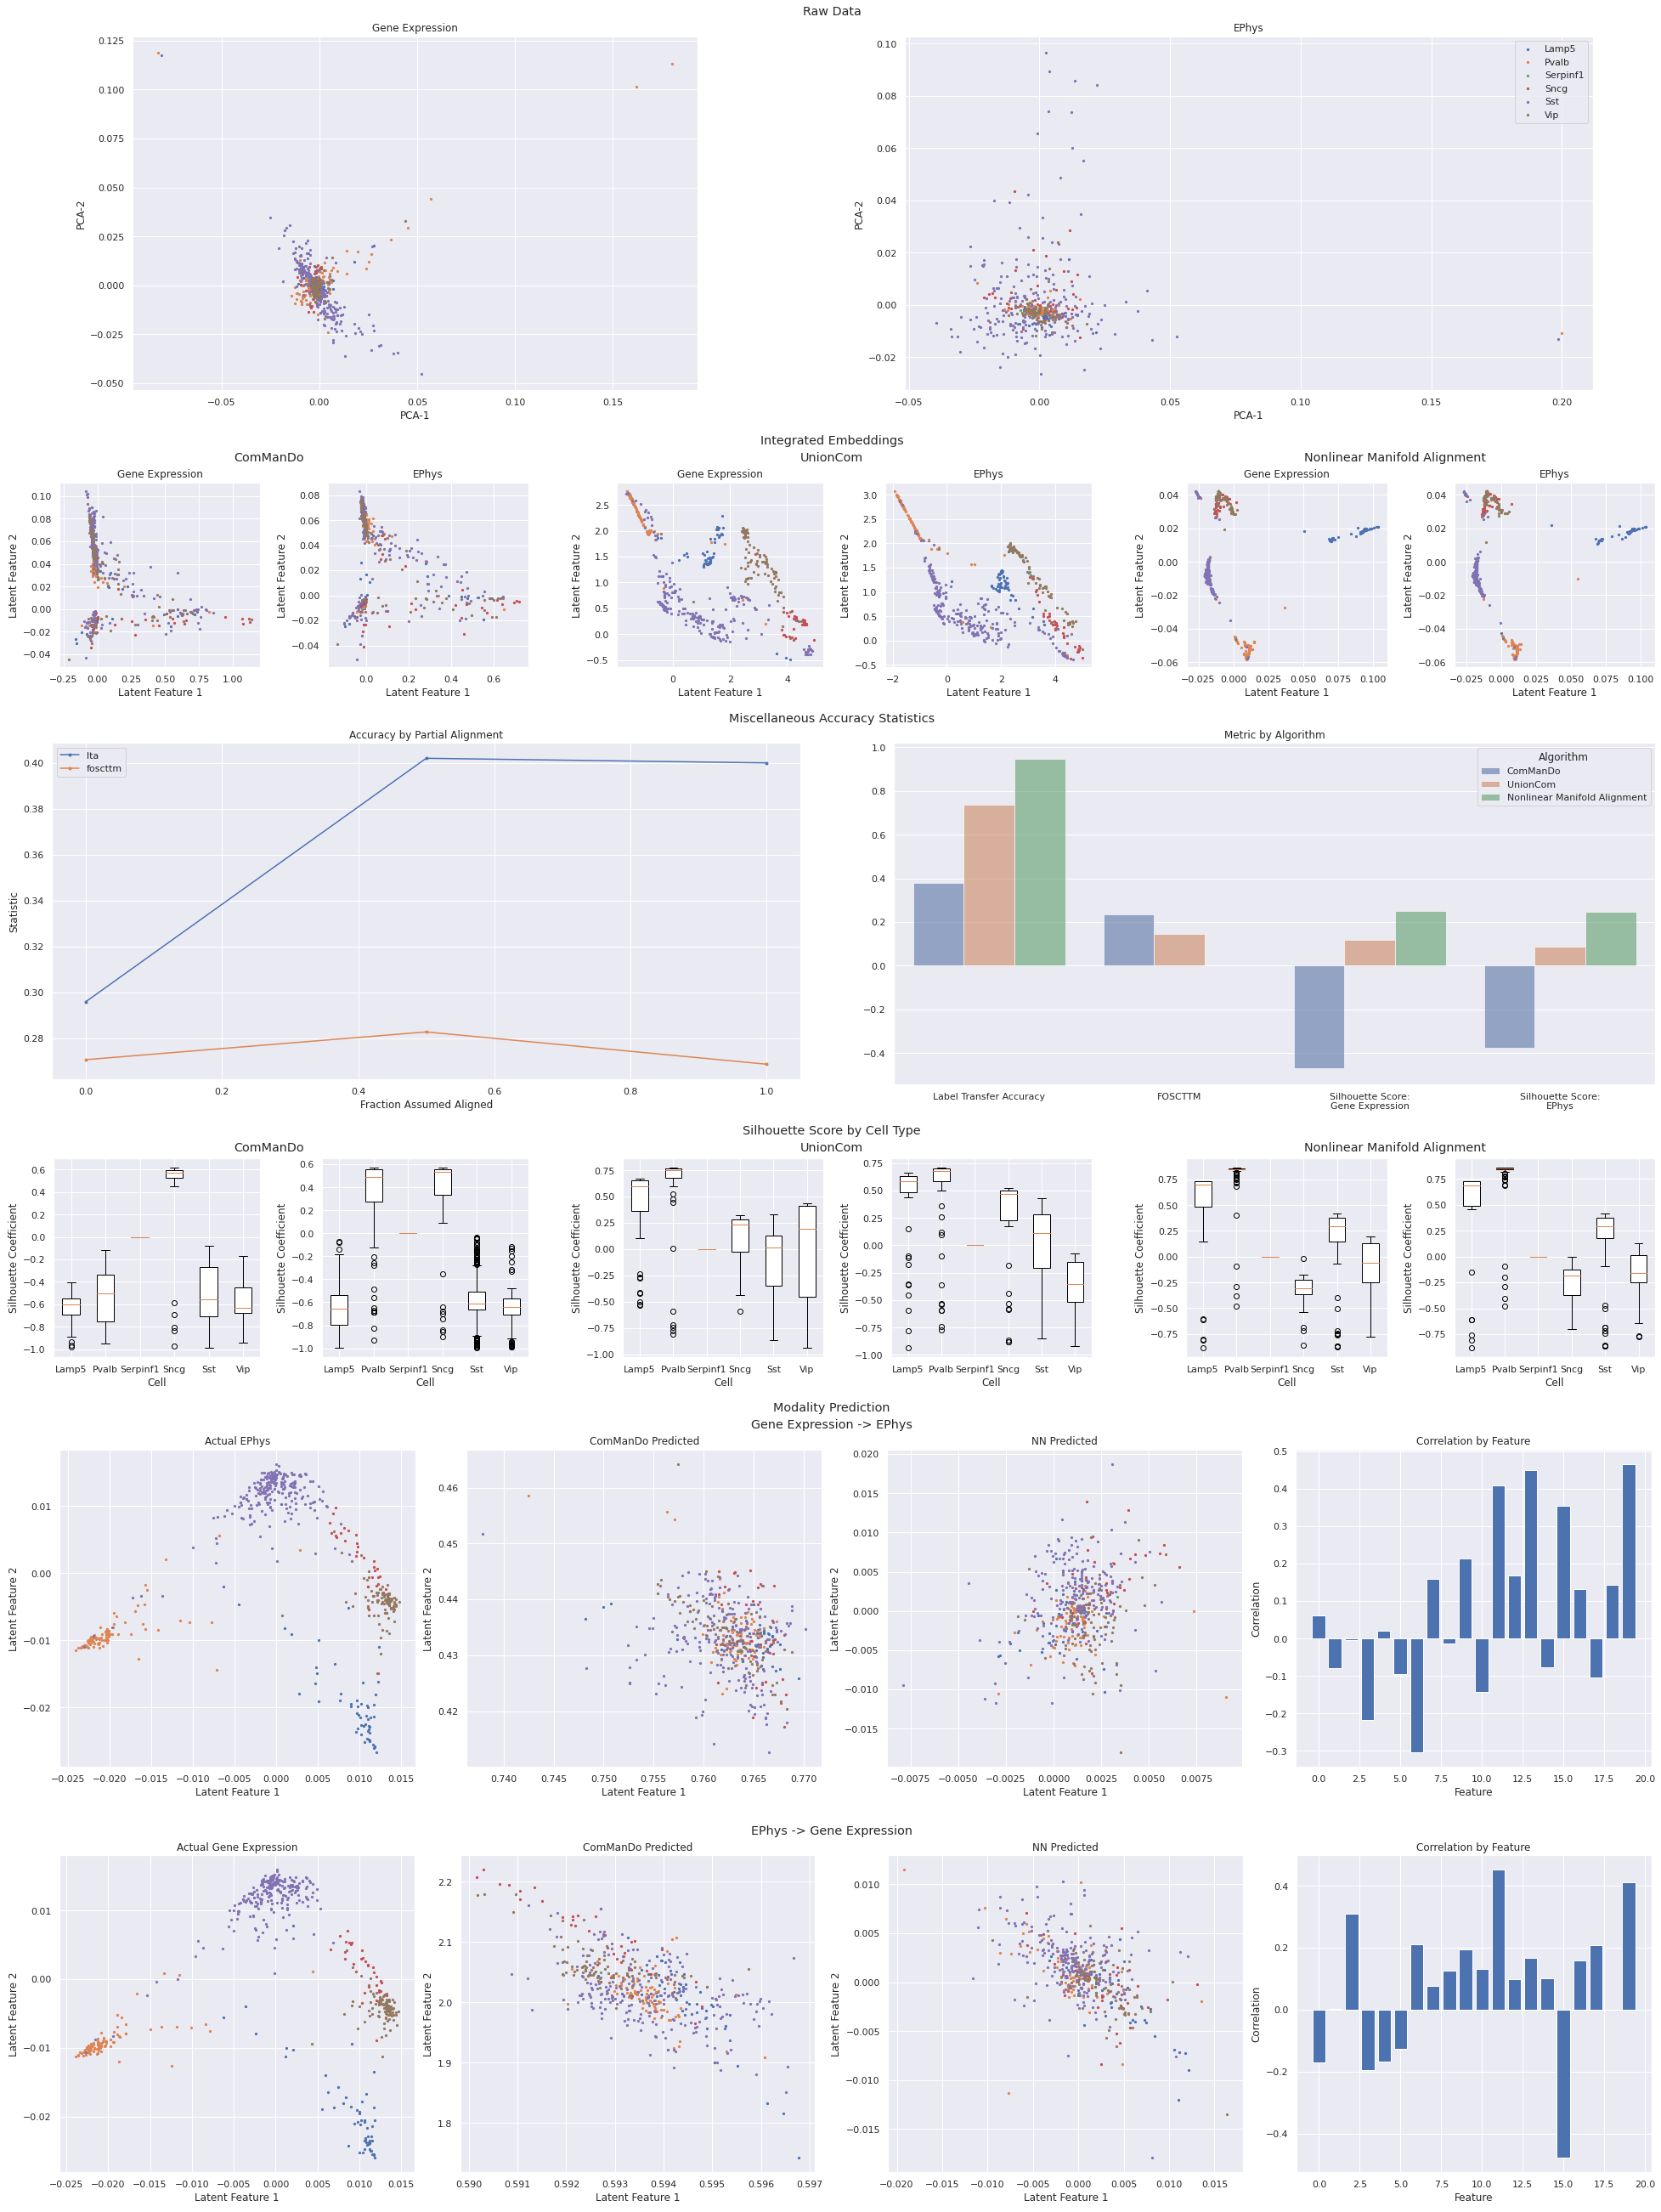

In [24]:
params = {
    'dataset_names': ['Gene Expression', 'EPhys'],
    'alg_results': [uc_data, nl_data],
    'alg_names': ['UnionCom', 'Nonlinear Manifold Alignment'],
    'scale': 27,
    # 'skip_partial': True,
    # 'skip_nn': True,
}
generate_figure(cm, cm_data, dataset, labels, **params)